In [1]:
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

In [2]:
df15 = pd.read_csv("../Dataset/21-02-2018.csv", low_memory = False)

In [3]:
df15 = df15.drop([0,1])

In [4]:
df15

,Dst Port,Fwd PSH Flags,Protocol,Bwd PSH Flags,Flow Duration,Fwd URG Flags,Tot Fwd Pkts,Bwd URG Flags,Tot Bwd Pkts,FIN Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2,80.0,0,6.0,0,37953.0,0,5.0,0,3.0,0,...,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,500.0,0,17.0,0,117573474.0,0,3.0,0,0.0,0,...,2.0,8.0,0.0,0.0,0.0,0.0,58800000.0,23800000.0,75600000.0,42000000.0
4,500.0,0,17.0,0,117573474.0,0,3.0,0,0.0,0,...,2.0,8.0,0.0,0.0,0.0,0.0,58800000.0,23800000.0,75600000.0,42000000.0
5,500.0,0,17.0,0,99743998.0,0,5.0,0,0.0,0,...,4.0,8.0,4000290.0,0.0,4000290.0,4000290.0,31900000.0,37900000.0,75600000.0,7200397.0
6,500.0,0,17.0,0,99743999.0,0,5.0,0,0.0,0,...,4.0,8.0,4000286.0,0.0,4000286.0,4000286.0,31900000.0,37900000.0,75600000.0,7200399.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048572,55484.0,0,6.0,0,1252.0,0,5.0,0,2.0,0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048573,57624.0,0,6.0,0,19055.0,0,5.0,0,2.0,0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048574,57623.0,0,6.0,0,36677.0,0,5.0,0,2.0,0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048575,57625.0,0,6.0,0,1849.0,0,5.0,0,2.0,0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df16Aux = pd.read_csv("../Dataset/02-03-2018.csv", low_memory = False)

In [6]:
df16Aux = df16Aux.drop([0,1])

In [7]:
df16Aux

,Dst Port,Fwd PSH Flags,Protocol,Bwd PSH Flags,Flow Duration,Fwd URG Flags,Tot Fwd Pkts,Bwd URG Flags,Tot Bwd Pkts,FIN Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2,443.0,0,6.0,0,141385.0,0,9.0,0,7.0,0,...,4.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49684.0,1,6.0,0,281.0,0,2.0,0,1.0,0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,443.0,0,6.0,0,279824.0,0,11.0,0,15.0,0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,443.0,0,6.0,0,132.0,0,2.0,0,0.0,0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,443.0,0,6.0,0,274016.0,0,9.0,0,13.0,0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044522,3389.0,0,6.0,0,3982183.0,0,14.0,0,8.0,0,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1044523,3389.0,0,6.0,0,3802316.0,0,14.0,0,8.0,0,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1044524,3389.0,0,6.0,0,4004239.0,0,14.0,0,8.0,0,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1044525,3389.0,0,6.0,0,3998435.0,0,14.0,0,8.0,0,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
listOrd = df15.columns.tolist()

In [9]:
df16 = pd.DataFrame()
for colu in listOrd:
    df16[colu] = df16Aux[colu]

In [10]:
df16

,Dst Port,Fwd PSH Flags,Protocol,Bwd PSH Flags,Flow Duration,Fwd URG Flags,Tot Fwd Pkts,Bwd URG Flags,Tot Bwd Pkts,FIN Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2,443.0,0,6.0,0,141385.0,0,9.0,0,7.0,0,...,4.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49684.0,1,6.0,0,281.0,0,2.0,0,1.0,0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,443.0,0,6.0,0,279824.0,0,11.0,0,15.0,0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,443.0,0,6.0,0,132.0,0,2.0,0,0.0,0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,443.0,0,6.0,0,274016.0,0,9.0,0,13.0,0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044522,3389.0,0,6.0,0,3982183.0,0,14.0,0,8.0,0,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1044523,3389.0,0,6.0,0,3802316.0,0,14.0,0,8.0,0,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1044524,3389.0,0,6.0,0,4004239.0,0,14.0,0,8.0,0,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1044525,3389.0,0,6.0,0,3998435.0,0,14.0,0,8.0,0,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df16Aux = None

In [12]:
input_label15 = np.array(df15.loc[:, df15.columns != "Label"]).astype(np.float)

In [13]:
output_label15 = np.array(df15["Label"])

In [14]:
out = []
for o in output_label15:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label15 = out

In [15]:
input_label16 = np.array(df16.loc[:, df16.columns != "Label"]).astype(np.float)

In [16]:
output_label16 = np.array(df16["Label"])

In [17]:
out = []
for o in output_label16:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label16 = out

In [18]:
dfAE = pd.concat([df15, df16])

In [19]:
input_labelAE = np.array(dfAE.loc[:, dfAE.columns != "Label"]).astype(np.float)

In [20]:
output_labelAE = np.array(dfAE["Label"])

In [21]:
out = []
for o in output_labelAE:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_labelAE = out

In [22]:
dfAE = None
df15 = None
df16 = None

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_labelAE)
input_label15 = scaler.transform(input_label15)
input_label16 = scaler.transform(input_label16)
input_labelAE = scaler.transform(input_labelAE)

In [24]:
input_labelAE, output_labelAE = shuffle(input_labelAE, output_labelAE)
input_label15, output_label15 = shuffle(input_label15, output_label15)
input_label16, output_label16 = shuffle(input_label16, output_label16)

## AutoEncoder

In [25]:
inp_train,inp_test,out_train,out_test = train_test_split(input_labelAE, input_labelAE, test_size=0.2)

In [26]:
input_model = keras.layers.Input(shape = (78,))
enc = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(input_model)
enc = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
enc = keras.layers.Dense(units = 18, activation = "relu")(enc)
dec = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
dec = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(dec)
dec = keras.layers.Dense(units = 78, activation = "relu", use_bias = True)(dec)
auto_encoder = keras.Model(input_model, dec)

In [27]:
encoder = keras.Model(input_model, enc)
decoder_input = keras.layers.Input(shape = (18,))
decoder_layer = auto_encoder.layers[-3](decoder_input)
decoder_layer = auto_encoder.layers[-2](decoder_layer)
decoder_layer = auto_encoder.layers[-1](decoder_layer)
decoder = keras.Model(decoder_input, decoder_layer)

In [28]:
auto_encoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00025), loss = "mean_squared_error", metrics = ['accuracy'])

In [29]:
train = auto_encoder.fit(x = np.array(inp_train), y = np.array(out_train),validation_split= 0.1, epochs = 10, verbose = 1, shuffle = True)

Epoch 1/10
47095/47095 [==============================] - 48s 1ms/step - loss: 0.0117 - accuracy: 0.7586 - val_loss: 0.0103 - val_accuracy: 0.6130
Epoch 2/10
47095/47095 [==============================] - 45s 960us/step - loss: 0.0102 - accuracy: 0.7804 - val_loss: 0.0101 - val_accuracy: 0.8719loss: 0.0102 -  - ETA: 0s - loss: 0.010
Epoch 3/10
47095/47095 [==============================] - 47s 1ms/step - loss: 0.0102 - accuracy: 0.7826 - val_loss: 0.0101 - val_accuracy: 0.5961acy - ETA:  - ETA:  - ETA: 5s - loss: 0.010 - ETA: 4s - loss: 0.0102 - accuracy:  - ETA: 4s - loss: 0.0102 - accu - ETA: 3s - loss: 0.0102 - ac - ETA: 3s - loss: 0.0102 - accuracy: 0. -
Epoch 4/10
47095/47095 [==============================] - 45s 962us/step - loss: 0.0102 - accuracy: 0.7829 - val_loss: 0.0101 - val_accuracy: 0.7923
Epoch 5/10
47095/47095 [==============================] - 47s 988us/step - loss: 0.0102 - accuracy: 0.7834 - val_loss: 0.0101 - val_accuracy: 0.7891
Epoch 6/10
47095/47095 [===========

In [30]:
predict = auto_encoder.predict(inp_test)

In [31]:
losses = keras.losses.mean_squared_error(out_test, predict).numpy()

In [32]:
total = 0
for loss in losses:
    total += loss
print(total / len(losses))

0.010032695569909789


In [33]:
input_labelAE = None
input_label15 = encoder.predict(input_label15).reshape(len(input_label15), 18, 1)
input_label16 = encoder.predict(input_label16).reshape(len(input_label16), 18, 1)

## Classificador

In [34]:
model = keras.Sequential([
        keras.layers.Conv1D(filters = 16, input_shape = (18,1), kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
        keras.layers.MaxPool1D(pool_size = 3),
        keras.layers.Conv1D(filters = 8, kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
        keras.layers.MaxPool1D(pool_size = 3),
        keras.layers.Flatten(),
        keras.layers.Dense(units = 2, activation = "softmax")
    ])

In [35]:
model.compile(optimizer= keras.optimizers.Adam(learning_rate= 0.00025), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [36]:
model.fit(x = np.array(input_label15), y = np.array(output_label15), validation_split= 0.1, epochs = 10, shuffle = True,verbose = 1)

Epoch 1/10
29492/29492 [==============================] - 42s 1ms/step - loss: 0.0624 - accuracy: 0.9885 - val_loss: 5.8082e-04 - val_accuracy: 0.9999
Epoch 2/10
29492/29492 [==============================] - 41s 1ms/step - loss: 8.2366e-04 - accuracy: 0.9999 - val_loss: 4.3833e-04 - val_accuracy: 1.0000
Epoch 3/10
29492/29492 [==============================] - 41s 1ms/step - loss: 3.4517e-04 - accuracy: 0.9999 - val_loss: 2.2550e-04 - val_accuracy: 1.0000
Epoch 4/10
29492/29492 [==============================] - 40s 1ms/step - loss: 2.0469e-04 - accuracy: 1.0000 - val_loss: 2.0910e-04 - val_accuracy: 1.0000
Epoch 5/10
29492/29492 [==============================] - 40s 1ms/step - loss: 2.4514e-04 - accuracy: 1.0000 - val_loss: 1.9018e-04 - val_accuracy: 1.0000
Epoch 6/10
29492/29492 [==============================] - 40s 1ms/step - loss: 1.4517e-04 - accuracy: 1.0000 - val_loss: 1.6735e-04 - val_accuracy: 1.0000
Epoch 7/10
29492/29492 [==============================] - 40s 1ms/step - l

In [37]:
res = [np.argmax(resu) for resu in model.predict(input_label16)]

In [38]:
cm = confusion_matrix(y_true = np.array(output_label16).reshape(len(output_label16)), y_pred = np.array(res))

In [39]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[494817 263517]
 [143272 142919]]


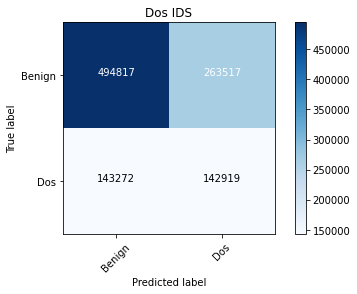

In [40]:
labels = ["Benign", "Dos"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Dos IDS")

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [42]:
output_label16 = np.array(output_label16).reshape(len(output_label16))
res = np.array(res)
fpr, tpr, _ = roc_curve(output_label16,  res)
auc = roc_auc_score(output_label16, res)

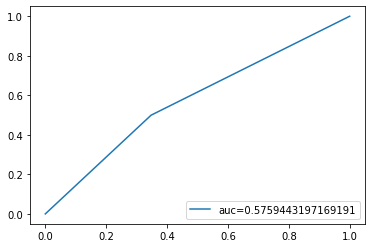

In [43]:
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()